> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [5]:
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
movies_df.shape

(10731, 17)

In [54]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10703.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.736896,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.079331,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [31]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  5170 non-null float64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              

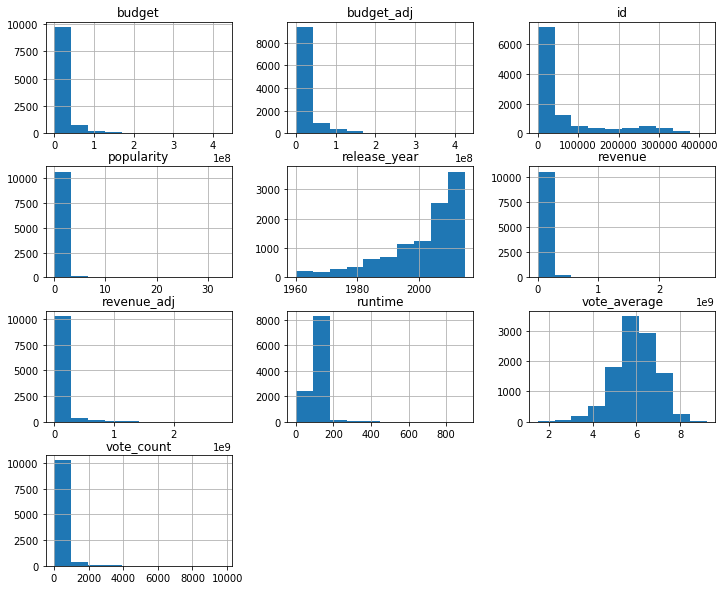

In [13]:
movies_df.hist(figsize=(12,10));

In [40]:
movies_df[movies_df.duplicated()].count()['id']

1

In [50]:
movies_df.isnull().sum()

id                         0
popularity                 0
budget                  5578
revenue                 5888
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [30]:
movies_df.query("budget == 0").count()['id']

0

In [33]:
movies_df.query("revenue == 0").count()['id']

0

In [35]:
movies_df.query("runtime == 0").count()['id']

31

In [ ]:
movies_df['runtime'] = movies_df['runtime'].replace({0:np.nan})

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [42]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies_df.drop(['imdb_id', 'homepage','tagline','overview'],axis=1, inplace=True)
movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [43]:
movies_df.drop_duplicates(inplace=True)

In [ ]:
movies_df['budget'] = movies_df['budget'].replace({0:np.nan})

In [ ]:
movies_df['revenue'] = movies_df['revenue'].replace({0:np.nan})

In [53]:
movies_df['runtime'] = movies_df['runtime'].replace({0:np.nan})

In [49]:
movies_df.dropna(subset=['cast','director','genres'],how='any',inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

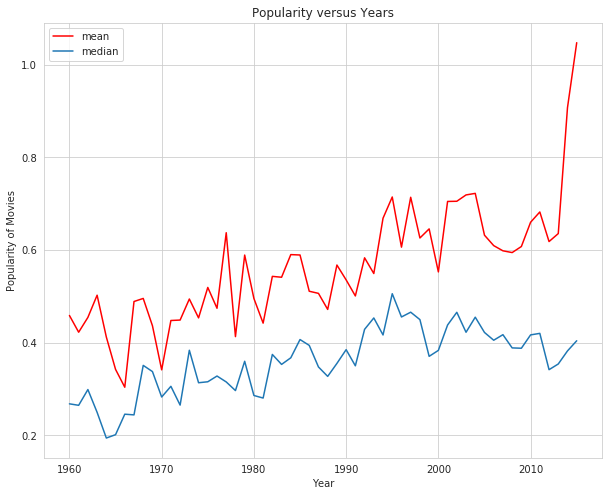

In [209]:
#setting the graph background
sns.set_style('whitegrid')
#calculating the mean of popularity ovee the years
mean_popularity = movies_df.groupby('release_year').mean()['popularity']
plt.subplots(figsize=(10,8))
#plotting the mean of popularity
mean_popularity.plot(color='r', label='mean')
#calculating the median of popularity
median_popularity = movies_df.groupby('release_year').median()['popularity']
#plotting the median popularity against year
median_popularity.plot(label='median')
#naming the x and y axes and the title
plt.title('Popularity versus Years')
plt.xlabel('Year')
plt.ylabel('Popularity of Movies');
plt.legend();

In [235]:
# find quartile, max and min values
dfname = movies_df.query("release_year > 2010")
min_value = movies_df['revenue'].min()
first_quantile = movies_df['revenue'].describe()[4]
second_quantile = movies_df['revenue'].describe()[5]
third_quantile = movies_df['revenue'].describe()[6]
max_value = movies_df['revenue'].max()
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
name = '{}_levels'.format('revenue')
dfname[name] = pd.cut(movies_df['revenue'], bin_edges, labels=bin_names, include_lowest = True)
dfname


/home/gautam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,High
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,High
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,High
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,High
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,High


In [223]:
# group the dataframe we created above with each revenue levels in each year, find the popularity meadian
dfq2_summary = dfname.groupby(['release_year','revenue_levels']).median()
dfq2_summary.tail()

id  popularity      budget      revenue  \
release_year revenue_levels                                                   
2014         High             171536.0    3.160100  65000000.0  241389711.5   
2015         Low              293281.5    0.572387   8000000.0     965064.5   
             Medium           273477.0    1.046518  14500000.0   16661077.0   
             Moderately High  274541.0    1.696682  16500000.0   59339326.5   
             High             254128.0    3.877764  77500000.0  240360392.0   

                              runtime  vote_count  vote_average    budget_adj  \
release_year revenue_levels                                                     
2014         High               108.5      1618.5          6.45  5.987092e+07   
2015         Low                100.0        87.5          5.90  0.000000e+00   
             Medium             106.0       283.0          6.20  9.199996e+06   
             Moderately High    107.0       575.5          6.40  1.379999e+07   
             High               118.0      1575.0          6.50  6.899997e+07   

                               revenue_adj  
release_year revenue_levels                 
2014         High             2.223419e+08  
2015         Low              8.878589e+05  
             Medium           1.532818e+07  
             Moderately High  5.459216e+07  
             High             2.211315e+08

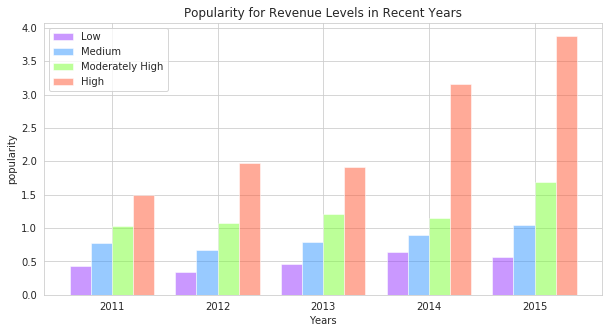

In [234]:
# positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 
sns.set_style('whitegrid')

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

#Bar with Low data, in position pos,
plt.bar(pos, dfq2_summary.query('revenue_levels =="Low"')['popularity'], width, alpha=0.5, 
        color='#9633FF', label= 'Low') 

#Bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], dfq2_summary.query('revenue_levels =="Medium"')['popularity'], width, alpha=0.5, 
        color='#3396FF',label='Medium') 

#Bar with Moderately High data,
plt.bar([p + width*2 for p in pos], dfq2_summary.query('revenue_levels =="Moderately High"')['popularity'], 
        width, alpha=0.5,color='#7AFF33',label='Moderately High') 

# Create a bar with High data,
plt.bar([p + width*3 for p in pos], dfq2_summary.query('revenue_levels =="High"')['popularity'], width, 
        alpha=0.5, color='#FF5733', label='High')

# Set the a and y axis label
ax.set_ylabel('popularity')
ax.set_xlabel('Years')
# Set the chart's title
ax.set_title('Popularity for Revenue Levels in Recent Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])
# Adding the legend and showing the plot
plt.legend();

### Research Question 2  (Replace this header name!)

In [195]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
genres_list = movies_df['genres'].str.cat(sep='|').split('|')
genres_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Western',
 'Drama',
 'Adventure',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Science Fiction',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Crime',
 'Drama',
 'Mystery',
 'Western',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Action',
 'Adventure',
 'Romance',
 'Fantasy',
 'Family',
 'Drama',
 'War',
 'Adventure',
 'Science Fiction',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 

In [140]:
genres_df = pd.DataFrame({'genre':genres_list})
top_genres = genres_df['genre'].value_counts().head()

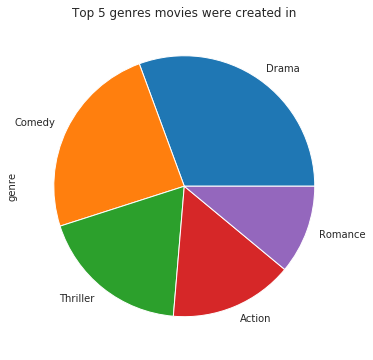

In [193]:
plt.subplots(figsize=(6,6))
top_genres.plot.pie(y='Top Genres');
plt.title("Top 5 genres movies were created in");

In [143]:
genre_popularity_df['genres'].value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres, dtype: int64

In [156]:
def get_genre_property(property):
    genre_property=movies_df[['genres',property]]
    genre_property_list = []
    for index,column in genre_property.iterrows():
        current_movie = column['genres'].split('|')
        current_property = column[property]
        for each_genre in current_movie:
            genre_property_list.append([each_genre,current_property])
    genre_property_list
    genre_property_df = pd.DataFrame(genre_property_list,columns=['genres',property])
    return genre_property_df

Text(0, 0.5, 'Genre')

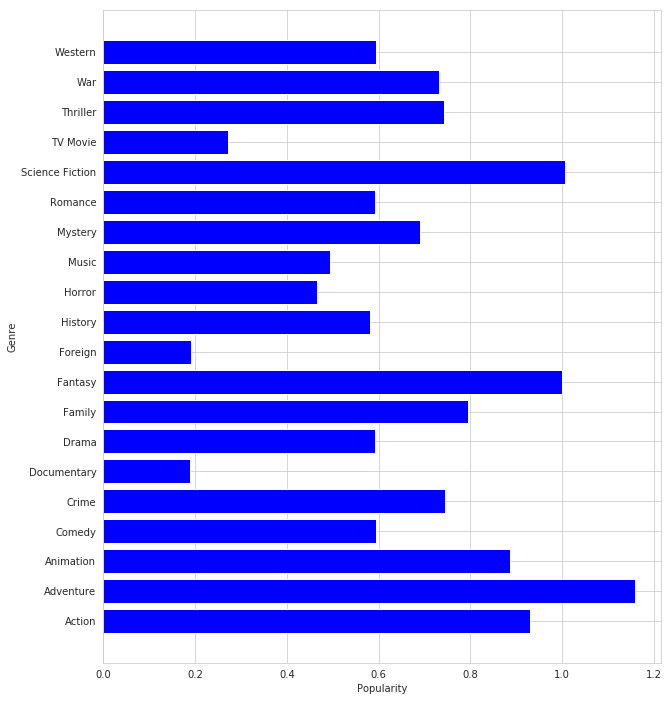

In [194]:
genre_popularity_df = get_genre_property('popularity')
mean_genre_popularity = genre_popularity_df.groupby('genres').mean()
plt.subplots(figsize=(10,12))
plt.barh(mean_genre_popularity.index, mean_genre_popularity['popularity'], color='blue')
plt.xlabel('Popularity')
plt.ylabel("Genre")

In [179]:
budget = get_genre_property('budget')
mean_budget = budget.groupby('genres').mean()
revenue = get_genre_property('revenue')
mean_revenue = revenue.groupby('genres').mean()
final_df = mean_budget.join(mean_revenue)
final_df

,budget,revenue
genres,,
Action,4.629070e+07,1.377323e+08
Adventure,6.095670e+07,1.974209e+08
Animation,6.298147e+07,2.219578e+08
Comedy,2.903262e+07,8.041019e+07
Crime,2.906049e+07,7.421367e+07
Documentary,5.092026e+06,1.057591e+07
Drama,2.445471e+07,6.126549e+07
Family,5.527845e+07,1.738114e+08
Fantasy,5.891150e+07,1.913738e+08


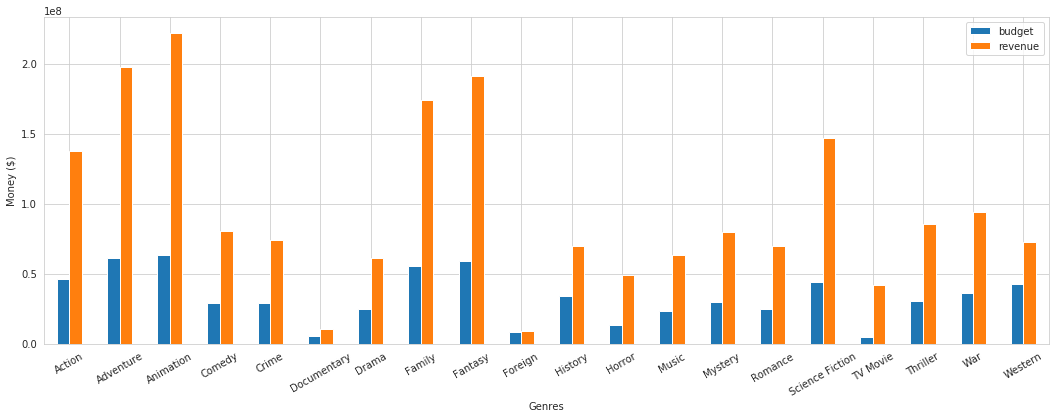

In [192]:
final_df.plot.bar(rot=0, figsize=(18,6))
plt.xticks(rotation=30)
plt.xlabel("Genres")
plt.ylabel("Money ($)")
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!